# Correlation

## Tripadvisor scraping

In [1]:
## load data
%matplotlib inline
import imp
import pandas as pd
import numpy as np
import geopandas
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X_trip = pd.read_csv('../data/external/tripadvisor_20200119_1453.csv', encoding = 'unicode_escape')

In [3]:
X_trip.head(2)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",mid_range,NaN,Fishermans Wharf,9 - 18,"American, Seafood","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Drinks","Parking Available, Validated Parking, Televisi...",877,681,228,65,35,['Located at Pier 39 its one of the places you...
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Mersea Restaurant,5.0,"[190, 10, 2, 1, 2]",mid_range,NaN,Treasure Island,5 - 16,"American, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch, Drinks","Takeout, Outdoor Seating, Seating, Parking Ava...",190,10,2,1,2,['Incredible food. World class views. Delightf...


In [4]:
X_trip['price_type'].fillna("Other_category", inplace=True)
dic_enc = {"price_type": {"cheap_eats":1, "mid_range":2, "fine_dining":3, "Other_category":0}}
X_trip.replace(dic_enc, inplace=True)
X_trip['price_type'] = X_trip['price_type'].astype('float64')
X_trip.head(2)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",2.0,NaN,Fishermans Wharf,9 - 18,"American, Seafood","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Drinks","Parking Available, Validated Parking, Televisi...",877,681,228,65,35,['Located at Pier 39 its one of the places you...
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Mersea Restaurant,5.0,"[190, 10, 2, 1, 2]",2.0,NaN,Treasure Island,5 - 16,"American, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch, Drinks","Takeout, Outdoor Seating, Seating, Parking Ava...",190,10,2,1,2,['Incredible food. World class views. Delightf...


In [7]:
X_trip['perc_excellent'] = X_trip['n_review_excellent']/(X_trip['n_review_excellent'] + X_trip['n_review_verygood'] + X_trip['n_review_average'] + X_trip['n_review_poor'] + X_trip['n_review_terrible'])
X_trip['perc_verygood'] = X_trip['n_review_verygood']/(X_trip['n_review_excellent'] + X_trip['n_review_verygood'] + X_trip['n_review_average'] + X_trip['n_review_poor'] + X_trip['n_review_terrible'])
X_trip['perc_average'] = X_trip['n_review_average']/(X_trip['n_review_excellent'] + X_trip['n_review_verygood'] + X_trip['n_review_average'] + X_trip['n_review_poor'] + X_trip['n_review_terrible'])
X_trip['perc_poor'] = X_trip['n_review_poor']/(X_trip['n_review_excellent'] + X_trip['n_review_verygood'] + X_trip['n_review_average'] + X_trip['n_review_poor'] + X_trip['n_review_terrible'])
X_trip['perc_terrible'] = X_trip['n_review_terrible']/(X_trip['n_review_excellent'] + X_trip['n_review_verygood'] + X_trip['n_review_average'] + X_trip['n_review_poor'] + X_trip['n_review_terrible'])
X_trip.head(2)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,...,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews,perc_excellent,perc_verygood,perc_average,perc_poor,perc_terrible
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",2.0,NaN,Fishermans Wharf,9 - 18,...,681,228,65,35,['Located at Pier 39 its one of the places you...,0.465005,0.361082,0.120891,0.034464,0.018558
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Mersea Restaurant,5.0,"[190, 10, 2, 1, 2]",2.0,NaN,Treasure Island,5 - 16,...,10,2,1,2,['Incredible food. World class views. Delightf...,0.926829,0.048780,0.009756,0.004878,0.009756


In [9]:
X_trip['cat_cuisines'] = X_trip['cuisines'].astype('category').cat.codes
X_trip.head(2)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,...,n_review_average,n_review_poor,n_review_terrible,list_reviews,perc_excellent,perc_verygood,perc_average,perc_poor,perc_terrible,cat_cuisines
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",2.0,NaN,Fishermans Wharf,9 - 18,...,228,65,35,['Located at Pier 39 its one of the places you...,0.465005,0.361082,0.120891,0.034464,0.018558,121
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Mersea Restaurant,5.0,"[190, 10, 2, 1, 2]",2.0,NaN,Treasure Island,5 - 16,...,2,1,2,['Incredible food. World class views. Delightf...,0.926829,0.048780,0.009756,0.004878,0.009756,12


In [14]:
X_trip['meals'] = X_trip['meals'].astype('category').cat.codes
X_trip.head(2)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,...,n_review_average,n_review_poor,n_review_terrible,list_reviews,perc_excellent,perc_verygood,perc_average,perc_poor,perc_terrible,cat_cuisines
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",2.0,NaN,Fishermans Wharf,9 - 18,...,228,65,35,['Located at Pier 39 its one of the places you...,0.465005,0.361082,0.120891,0.034464,0.018558,121
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Mersea Restaurant,5.0,"[190, 10, 2, 1, 2]",2.0,NaN,Treasure Island,5 - 16,...,2,1,2,['Incredible food. World class views. Delightf...,0.926829,0.048780,0.009756,0.004878,0.009756,12


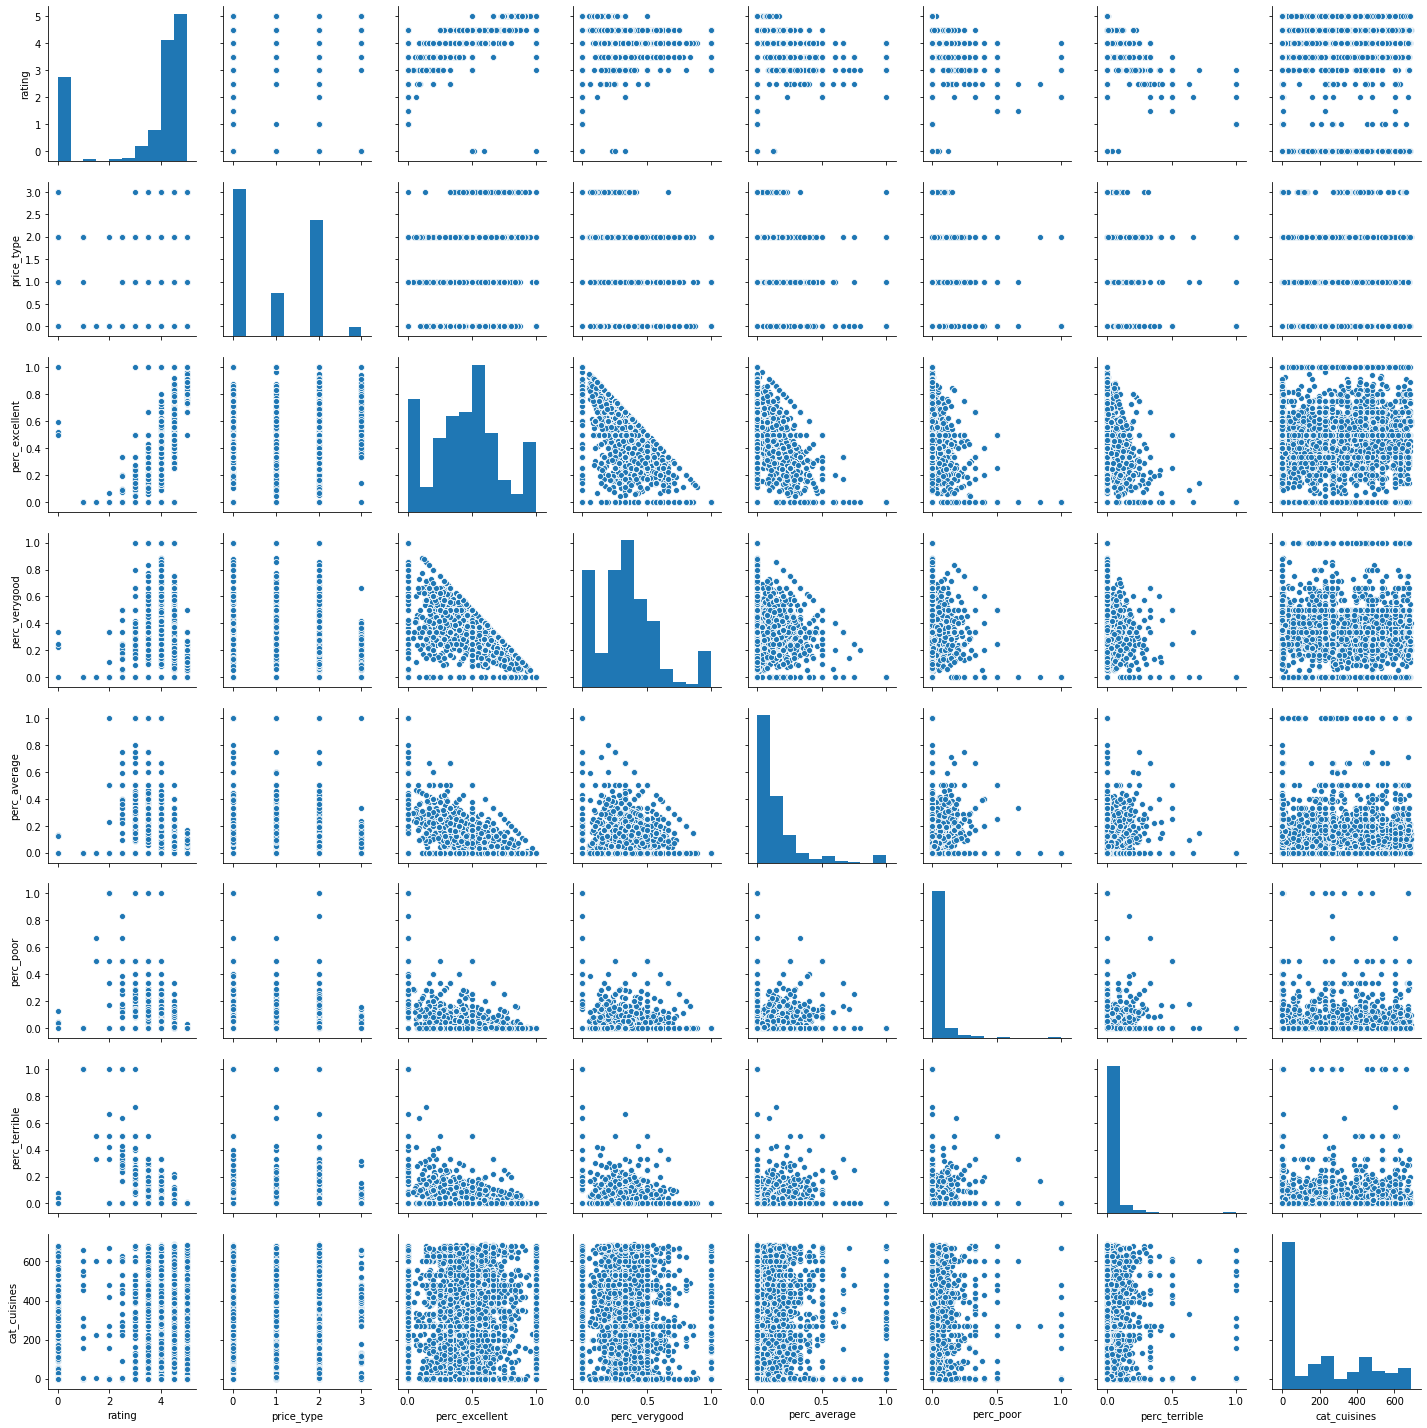

In [10]:
columns = ['rating', 'price_type', 'borough', 'perc_excellent', 'perc_verygood', 'perc_average', 'perc_poor', 'perc_terrible', 'cat_cuisines']
sns.pairplot(X_trip[columns])

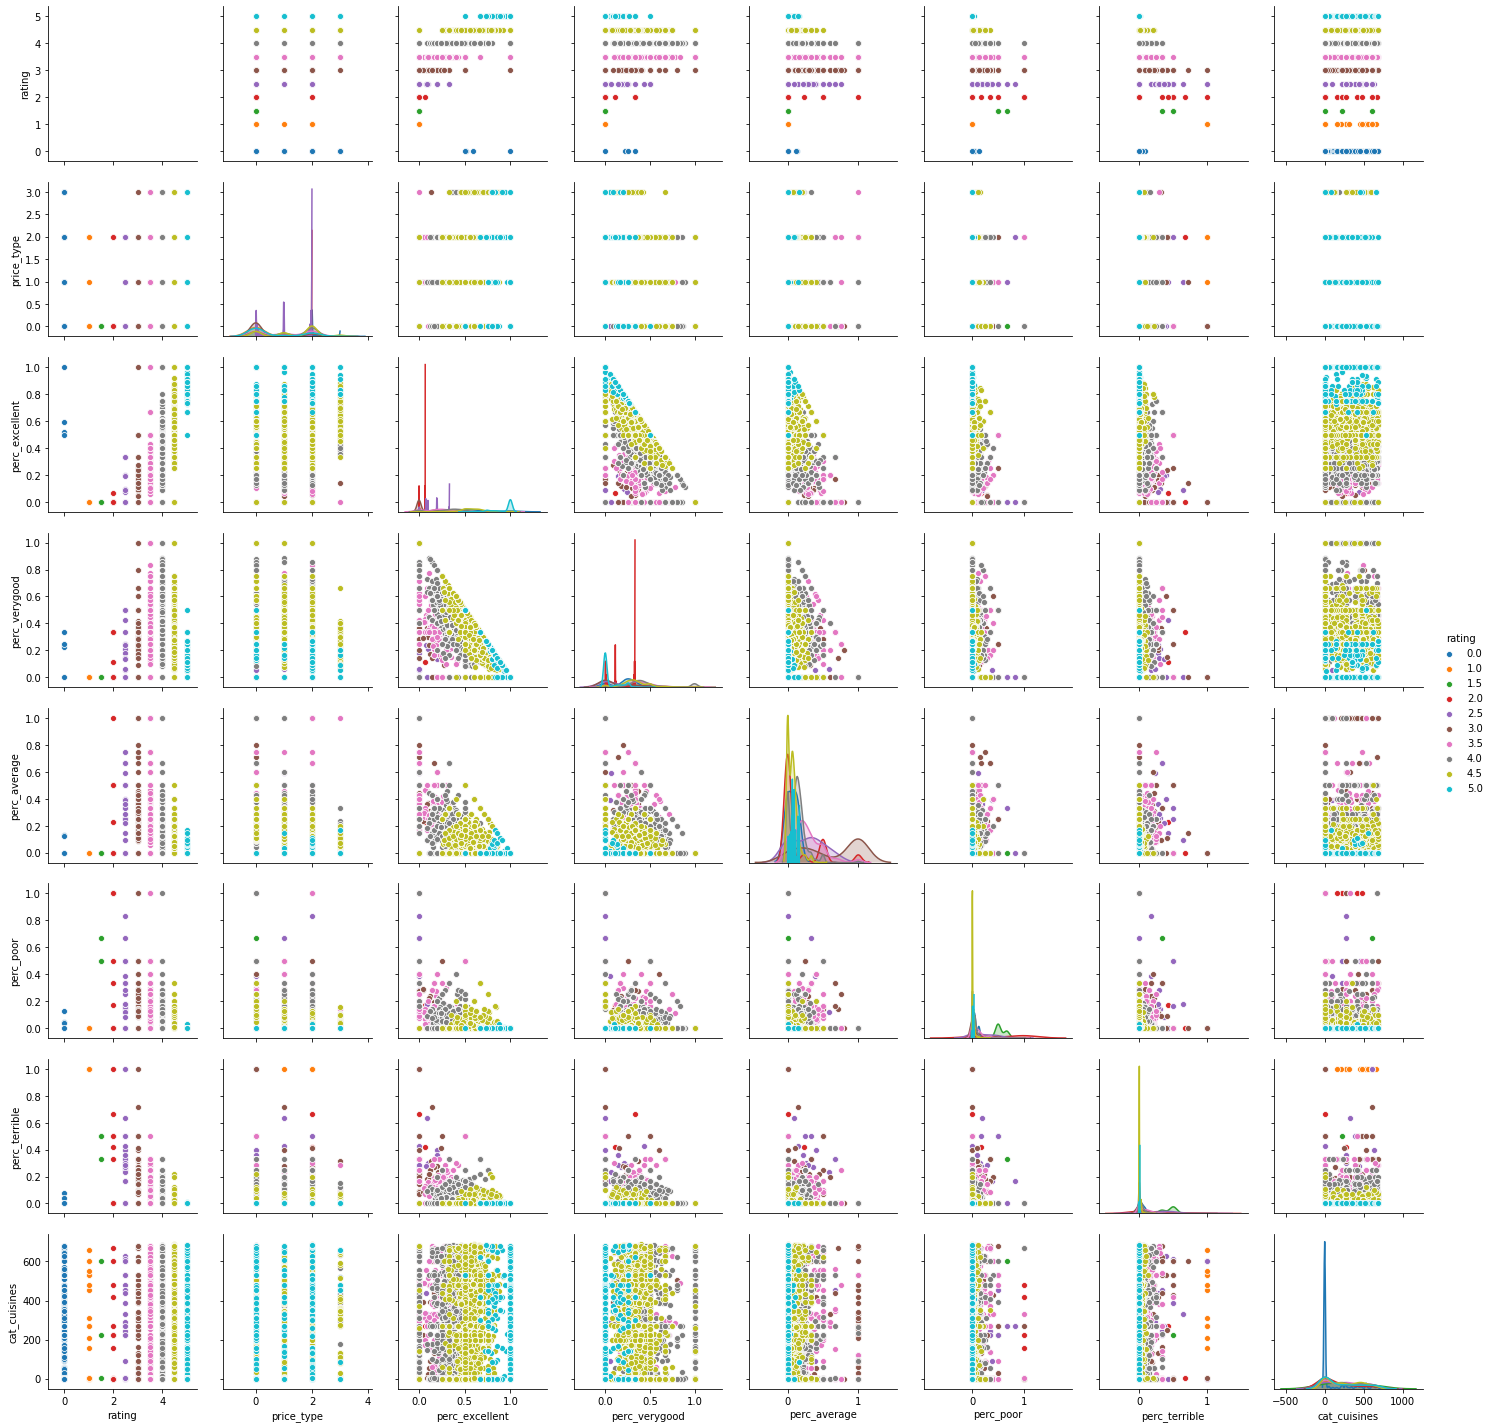

In [13]:
columns = ['rating', 'price_type', 'borough', 'perc_excellent', 'perc_verygood', 'perc_average', 'perc_poor', 'perc_terrible', 'cat_cuisines']
sns.pairplot(X_trip[columns], hue='rating')

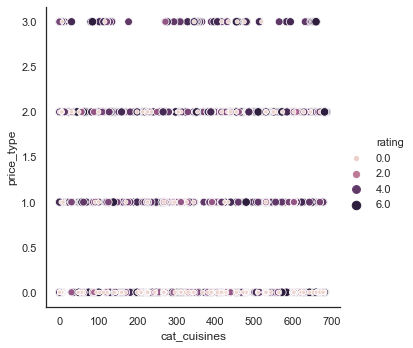

In [24]:
sns.set(style='white')

sns.relplot(y='price_type', x='cat_cuisines', size='rating', hue='rating',
            #palette='colorblind',
            data=X_trip)